Recall this worked example:

In [57]:
from math import factorial

In [229]:
import matplotlib.pyplot as plt
from math import pi

In [219]:
import numpy as np
import scipy.integrate as integrate
import scipy as scipy
import scipy.stats as stats
import seaborn as sns
%pylab inline
def f(x): return x**3

given_area = integrate.quad(f, 0, 10)[0]
given_mean = given_area / 10.

samples = f(np.random.uniform(0, 10, 1000))
approx_mean = np.mean(samples)
approx_area = approx_mean * 10

print(approx_mean, given_mean)

Populating the interactive namespace from numpy and matplotlib
245.567146948 250.00000000000006


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean', 'f', 'var', 'pi']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Let's practice. Following the example above, calculate the mean value and total value of the following integrals:

$A = \int_{5}^{15} x^3 dx$

$B = \int_{0}^{7} x! dx$

$C = \int_{-5}^{5} 1/\pi^x dx$

You may develop reusable functions to keep your code clean.

In [182]:
def analytic_integral(a,b,function ):
    """Return area, mean"""
    area = integrate.quad(function,a,b)[0]
    mean = area / (b-a)
    return area , mean

In [142]:
def mci_integral(a,b,function, samples = 1000):
    """Return the area , mean"""
    samples = function(np.random.uniform(a,b,samples))
    apr_mean = np.mean(samples)
    apr_area = apr_mean * (b-a)
    return  apr_area, apr_mean

In [48]:
a = lambda x: x**3

In [68]:
b = lambda x: scipy.special.gamma(x+1)

In [74]:
c = lambda x: 1/(pi**x)

In [69]:
print(f" the mean of function A under analytic is {analytic_integral(5,15,a)[1]}")

 the mean of function A under analytic is 1250.0000000000002


In [70]:
print(f" the mean of function  A under MCI is {mci_integral(5,15,a)[1]}")

 the mean of function  A under MCI is 1235.153890198786


In [71]:
print(f" the mean of function B under analytic is {analytic_integral(0,7,b)[1]}")

 the mean of function B under analytic is 371.8912613326633


In [79]:
print(f" the mean of function  B under MCI is {mci_integral(0,7,b)[1]}")

 the mean of function  B under MCI is 377.34207354683997


In [75]:
print(f" the mean of function C under analytic is {analytic_integral(-5,5,c)[1]}")

 the mean of function C under analytic is 26.732631060345852


In [76]:
print(f" the mean of function  C under MCI is {mci_integral(-5,5,c)[1]}")

 the mean of function  C under MCI is 24.3491333492297


Now, let's move on to statistical distributions.

Use the `numpy.random` package to find your samplers.

Create a standard normal distribution and use Monte Carlo integration to approximate the expectation. Use a sample size of 10000.

In [119]:
mu = 0
var =1

In [129]:
normal_dist = lambda x: stats.norm().rvs(x)

In [136]:
samples = normal_dist(10_000)

In [137]:
print(f"The  MCI mean of the normal with mu ={mu} and var = {var} =  {np.mean(samples)}")

The  MCI mean of the normal with mu =0 and var = 1 =  -0.0008197593796883739


Now, do the same with a normal distribution with a larger mean and variance.

In [109]:
mu_2 = 10
var_2 =20

In [110]:
normal_dist_2 = lambda x: stats.norm(mu_2,var_2).rvs(x)

In [114]:
samples_2 = normal_dist_2(10_000)

In [115]:
print(f"The  MCI mean of the normal with mu ={mu_2} and var = {var_2} =  {np.mean(samples_2)}")

The  MCI mean of the normal with mu =10 and var = 20 =  10.171464811826608


What is the relationship between the correctness of this approximation and increases in variance of the normal distribution? Why do you think that is? (You may need to experiment with more parameter settings to discover this relationship.)

- As the variance increases, the approximation using the MCI method decreases in precision. This is because there is a larger range of numbers to sample from. Sampling takes points that have a higher probability of being picked. Therefore, with a larger variance, there is a larger spread of poitns to choose from.

The standard error of our Monte Carlo estimate is:
    
$$\widehat{se} = \frac{s}{\sqrt{N}}$$
    
Where
    $$s^2 = \frac{\sum_{i=1}^{N}(S_i - \widehat{E})^2}{N - 1}$$
    and $\widehat{E}$ is our estimate of the mean,
    $N$ is the number of samples we've collected, and
    $S$ is the array of samples that we've collected.
    

Implement the standard error function.

In [139]:
se = lambda sample_sd, n: sample_sd / np.sqrt(n)

In [184]:
def sigma_squarred(samples,mean):
    return np.sum([((i-mean)**2) for i in samples])/(len(samples)-1)

Now, returning to a simple calculus example, calculate the MC mean and standard error of the MC mean of the following integral:

$$I = \int_{0}^{2} x^3 dx$$

In [185]:
analytic_integral(0,2,a)

(4.0, 2.0)

In [192]:
area,mean = mci_integral(0,2,a)

In [193]:
mean

1.9349098521329593

In [188]:
samples = 1000

In [189]:
var  = sigma_squarred(np.linspace(0,2,samples),mean)

In [190]:
print(f"The var is {var}")

The var is 0.9989053496562367


In [191]:
print(f"The se is {se(np.sqrt(var),samples)}")

The se is 0.031605463920914637


Now, a natural question is: what is the relationship between correctness and sample size?

We expect the estimate to become more correct with more samples. But, at what rate?

1. Using a normal distribution, collect MC runs using increasing numbers of samples (you should only need to collect data of the shape [n_samples, standard_error]).

2. Collect enough data that you can plot or otherwise visualize the relationship between sample size and standard error.

3. Posit a relationship between sample size and standard error.

4. Fit a linear regression to your data to defend your argument (where the (possibly transformed) number of samples predicts the standard error).

In [215]:
def sample_size_se(func, range_of_samples=[10,100,1000,10_000,100_000,1_000_000,10_000_000], 
                   range_=(-10,10)):
    """Calculate the SE using MCI for the number of samples"""
    samples_se = []
    for sample_size in range_of_samples:
        print(f"Starting sample size = {sample_size}")
        samples = func(sample_size)
        mean = np.mean(samples)
        var = sigma_squarred(np.linspace(range_[0],range_[1],sample_size),mean)
        standard_error = se(np.sqrt(var),len(samples))
        samples_se.append((sample_size,standard_error))
    return samples_se

In [216]:
data = sample_size_se(normal_dist)

Starting sample size = 10
Starting sample size = 100
Starting sample size = 1000
Starting sample size = 10000
Starting sample size = 100000
Starting sample size = 1000000
Starting sample size = 10000000


In [217]:
data

[(10, 2.1279226867137697),
 (100, 0.58610306517547461),
 (1000, 0.18285140855391094),
 (10000, 0.057743764099039981),
 (100000, 0.018257692765167814),
 (1000000, 0.0057735113849327222),
 (10000000, 0.0018257421324479458)]

In [ ]:
plt.

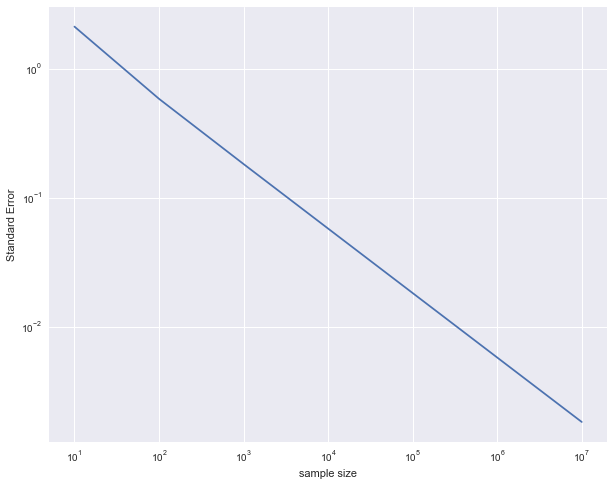

In [232]:
plt.figure(figsize=(10,8))
plt.loglog(np.array( [i[0] for i in data]), np.array( [i[1] for i in data]))
plt.xlabel('sample size')
plt.ylabel('Standard Error')

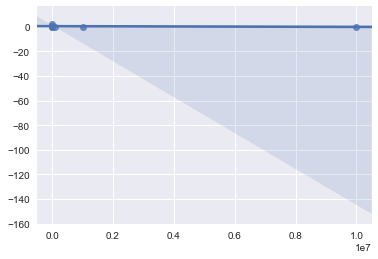

In [404]:
sns.regplot(np.array( [i[0] for i in data]), np.array( [i[1] for i in data]))

Finally, let us examine how naïve Monte Carlo methods may be inadequate in certain situations.

Suppose we want to estimate the expectation of a random variable $Y$ that has the following form:

$$
    Y \sim 
\begin{cases}
    X              & \text{if } X \in [1, 3]\\
    0              & \text{otherwise}
\end{cases}
$$

$$
    X \sim \mathcal{N}(0, 1)
$$

The key idea here is that we cannot sample directly from $Y$. We must instead sample from $X$, then filter its results to be within the range $[1, 3]$.

1. Create a function to sample from the random variable Y. It should be based on sampling of the normal distribution.
2. Use Monte Carlo integration to estimate $E[Y]$.
3. Now, create a random variable $Y2$ that is like $Y$, but the predicate selects for $X \in [1,2]$.
4. What happens to the quality of our estimate? Does the error change?
5. What, if anything, does this imply about when we should choose to use Monte Carlo integration?

In [304]:
def y(func,samples):
    s = normal_dist(samples)
    filtered_samples = np.where((s>=1) & (s<=3),s,0)
    return filtered_samples

In [340]:
def y_2(func,samples):
    s = normal_dist(samples)
    filtered_samples = np.where((s>=1) & (s<=2),s,0)
    return filtered_samples

In [306]:
def mci_integral_adapted(a,b,function):
    """Return the area , mean"""
    samples = function
    apr_mean = np.mean(samples)
    apr_area = apr_mean * (b-a)
    return  apr_area, apr_mean

In [406]:
samples_n = 10_000

In [407]:
area_n, mean_n = mci_integral_adapted(-10,10,y(normal_dist,samples_n))

In [408]:
print(f"The expected value of Y_one = {mean_n} with samples = {samples_n}")

The expected value of Y_one = 0.23925217026652648 with samples = 10000


In [409]:
area_n_y2, mean_n_y2 = mci_integral_adapted(-100,100,y_2(normal_dist,samples_n))

In [410]:
print(f"The expected value of Y_two = {mean_n_y2} with samples = {samples_n}")

The expected value of Y_two = 0.1872335333839317 with samples = 10000


In [419]:
var_y1 = sigma_squarred(y(normal_dist,samples_n),mean_n)

In [420]:
var_y1

0.33827657629392405

In [421]:
se_y1 = se(np.sqrt(var_y1), samples_n)

In [422]:
print(f"The SE for Y1 = {se_y1}")

The SE for Y1 = 0.005816154883545692


In [424]:
var_y2 = sigma_squarred(y_2(normal_dist,samples_n),mean_n_y2)
se_y2 = se(np.sqrt(var_y2), samples_n)
print(f"The SE for Y2 = {se_y2}")

The SE for Y2 = 0.004881966721292801


In [425]:
se_y1 - se_y2

0.00093418816225289067

- The error is pretty consistent across both estimates, but the SE for the larger range is slightly larger than the SE for the smaller range. 
- If you have a smaller range, you can use MCI. Also, if you have a larger sample size you can use MCI.